# <center>Customer Lifetime Value</center>

[CLV Data Source](https://drive.google.com/drive/folders/1GR7l3uWmcOCA2sxx1W-cEkReDxdedoeJ?usp=drive_link)

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **1. Business Problem Understanding**

**Background**

Customer lifetime value, or CLV, is a measure of how important a customer is to a company. From this value, a company can determine the profit gained from a customer and the costs incurred to acquire new customers or retain existing ones. This figure is quite important for a company if it wants to effectively understand the total profit (value) that can be obtained from maintaining a business relationship with a customer over their entire lifetime.

In the case of an insurance company, knowing the CLV can help improve several aspects of the company's performance, including the following:

* Marketing can use CLV information to identify customers who are likely to make fewer claims and pay higher premiums. Marketing can then focus on customers who generate significant profits for the company.
* Customer service can determine the appropriate methods to handle each customer, ensuring that high costs are not incurred for customers with a low CLV.
* Risk management can calculate how a customer can provide profit and the steps needed when that customer decides to leave.

**Problem Statement**

Customer Lifetime Value (CLV) can be calculated based on two pieces of information: Customer Value (the average value of a customer) and Average Customer Lifespan (the average duration of a customer's business relationship with the company). These two pieces of information are quite limited and do not provide a detailed picture of customer characteristics. Therefore, although a CLV value can be obtained, this information cannot be widely used. Additionally, manually calculating the CLV value for a company with a diverse range of customers with varying characteristics takes a considerable amount of time.

By predicting Customer Lifetime Value, a company can determine which customers are likely to have a high value and which are not. The company can then focus its marketing efforts on high-value customers rather than low-value customers. This can increase the company's efficiency. Therefore, the company needs a fast and accurate method to understand and predict the CLV of customers based on the available data.

**Goals**

Based on the problem statement, the company needs a tool that can predict and help determine the Customer Lifetime Value (CLV) of their customers accurately based on certain features. Differences in various customer data, such as vehicle type, income level, and education level, can enhance the accuracy of these customer value predictions.

**Analytic Approach**

An analytic approach needs to be undertaken to analyze data and identify patterns in customer characteristics that influence the resulting CLV.

We will build a machine learning regression model that will help the insurance company provide a CLV prediction tool. This tool will significantly assist the company in accelerating the planning and implementation processes related to customers (including marketing, relationship building, prioritization, etc.), thereby maximizing the company's profits.

**Metric Evaluation**

The Metric Evaluation that will be used is as follows:
* RMSE is the root mean square error.
* MAE is the mean absolute error.
* MAPE is the mean absolute percentage error generated by the regression model.

Smaller values of RMSE, MAE, and MAPE indicate that the model is more accurate in predicting CLV.

Additionally, we can use R-squared or adj. R-squared if the selected model is a linear model. R-squared is used to determine how well the model represents the variance in the overall data. A value closer to 1 indicates a better fit of the model to the observed data. However, this metric is not valid for non-linear models.

### **2. Data Understanding**

The dataset contains customer data along with their respective CLV values.

**Features Information**

| **Feature** | **Data Type** | **Description** |
| --- | --- | --- |
| Vehicle Class | Object | Class of Customer Vehicle |
| Coverage | Object | Type of Insurance Policies |
| Renew Offer Type | Object | Type of Renewal Offers |
| Employment Status | Object | Customer Employment Status |
| Marital Status | Object | Customer Marital Status |
| Education | Object | Customer Education Level |
| Number of Policies | Float | Number of Policies Customer Currently Owns |
| Monthly Premium Auto | Float | Amount of customers' monthly insurance payments (in US$)|
| Total Claim Amount | Float | Cumulative Amount of Claims Since Policy Inception|
| Income | Float | Customer Income (in US$)|
| Customer Lifetime Value | Float | Customer Lifetime Value |

[Feature Information Source](https://www.kaggle.com/code/juancarlosventosa/models-to-improve-customer-retention/notebook) 
<br>

**Import Libraries**

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Machine Learning Algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

# Evaluation Metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

**Load Dataset**

Let's load the dataset first.

In [3]:
df = pd.read_csv('data_customer_lifetime_value.csv')
df.head()

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


It turns out, each row in this dataset represents information about a customer of company A. Let's calculate the number of customers (number of rows) in this dataset using the .shape function.

In [4]:
df.shape

(5669, 11)

There are 5669 customer data entries in this dataset.

Let's display various information about this dataset.

In [5]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5669.000000,5669.000000,5669.000000,5669.000000,5669.000000
mean,2.979361,93.026989,431.407103,37868.188569,8029.874592
std,2.393187,34.551795,287.558038,30490.490723,6916.708246
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,266.932542,0.000000,3954.344534
50%,2.000000,82.000000,379.200000,34322.000000,5800.188903
75%,4.000000,109.000000,549.986128,62464.000000,9031.214859
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5669,5669,5669,5669,5669,5669
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2858,3477,2292,3541,3305,1703


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   float64
 7   Monthly Premium Auto     5669 non-null   float64
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   float64
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(5), object(6)
memory usage: 487.3+ KB


In [7]:
df.isna().sum()

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64

It can be seen that there are no 'NaN' values in this dataset. However, this doesn't mean there are no missing values at all. Sometimes, a data engineer uses specific codes to indicate missing values. Let's check each unique data using the loop code below to see each unique data from each column.

In [8]:
for i in df.columns:
   print(df[i].value_counts())
   print()

Vehicle Class
Four-Door Car    2858
Two-Door Car     1186
SUV              1096
Sports Car        307
Luxury SUV        115
Luxury Car        107
Name: count, dtype: int64

Coverage
Basic       3477
Extended    1704
Premium      488
Name: count, dtype: int64

Renew Offer Type
Offer1    2292
Offer2    1835
Offer3     900
Offer4     642
Name: count, dtype: int64

EmploymentStatus
Employed         3541
Unemployed       1429
Medical Leave     267
Disabled          252
Retired           180
Name: count, dtype: int64

Marital Status
Married     3305
Single      1514
Divorced     850
Name: count, dtype: int64

Education
Bachelor                1703
College                 1660
High School or Below    1620
Master                   460
Doctor                   226
Name: count, dtype: int64

Number of Policies
1.0    2008
2.0    1413
3.0     727
7.0     271
5.0     270
9.0     264
4.0     251
6.0     236
8.0     229
Name: count, dtype: int64

Monthly Premium Auto
65.0     217
71.0     203
66.0  

As suspected, it turns out that in the 'Income' column, there are 1429 data points that are valued '0'. Given the substantial number, we can conclude that all data in the 'Income' column with a value of '0' are missing values. We will address these missing values using an iterative imputer, which we will apply later.

---
Now, let's check for duplicate data.

In [9]:
df_duplicate = pd.DataFrame({
    'No.':[1],
    'Number of Duplicate Data Entries':df.duplicated().sum(),
    'Percentage of Duplicate Data Entries':df.duplicated().sum() / len(df) * 100,
})

df_duplicate.drop(columns='No.', inplace=True) 


df_duplicate

,Number of Duplicate Data Entries,Percentage of Duplicate Data Entries
0,618,10.901394


In [10]:
df.shape

(5669, 11)

It turns out, there are 618 duplicate entries (about 10.9% of the total data). Since many of our features are numerical and continuous, the likelihood of duplicates due to incorrect input is very high. Therefore, to avoid overfitting the model, we should drop all duplicate entries.

In [11]:
df = df.drop_duplicates()
df.shape

(5051, 11)

After removing the duplicate data, let's correct the column name 'EmploymentStatus' to 'Employment Status' to ensure consistent formatting.

In [12]:
df = df.rename(columns={'EmploymentStatus':'Employment Status'})
df.head()

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1.0,116.0,556.800000,17913.0,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1.0,62.0,355.820799,19030.0,2372.155492


### **Numerical Data Distribution**

In [13]:
num_features = list(df.describe().columns)

num_features

['Number of Policies',
 'Monthly Premium Auto',
 'Total Claim Amount',
 'Income',
 'Customer Lifetime Value']

In [14]:
from scipy.stats import normaltest

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


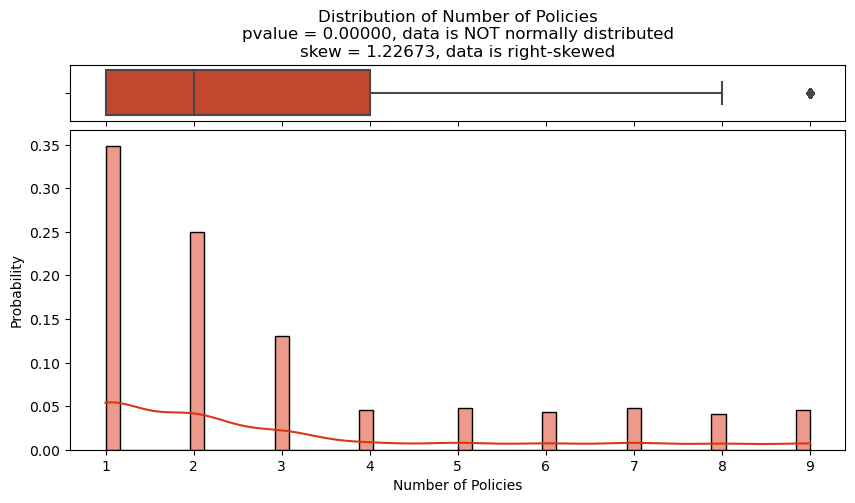

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


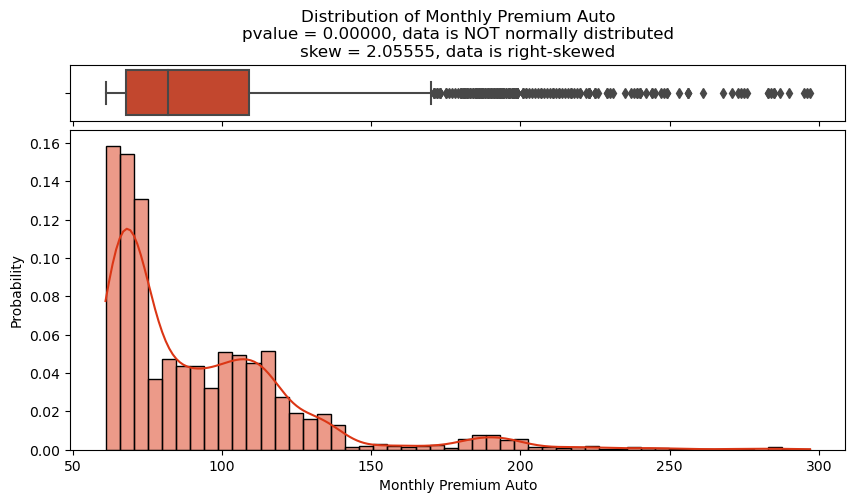

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


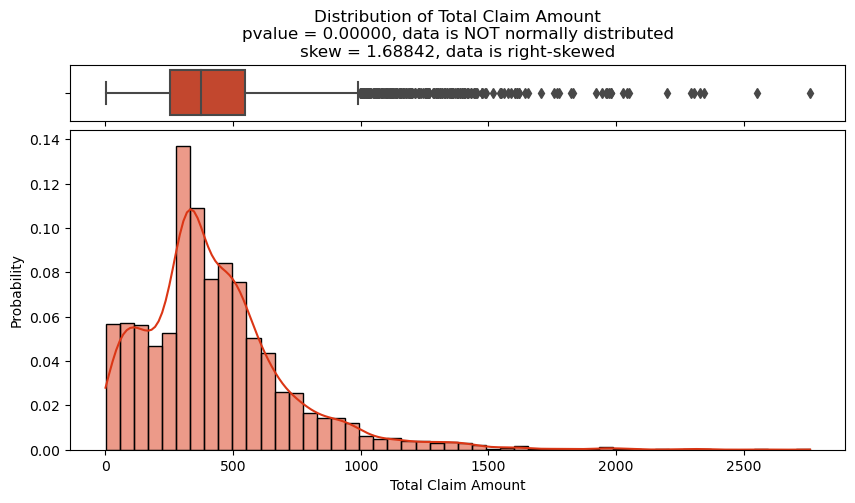

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


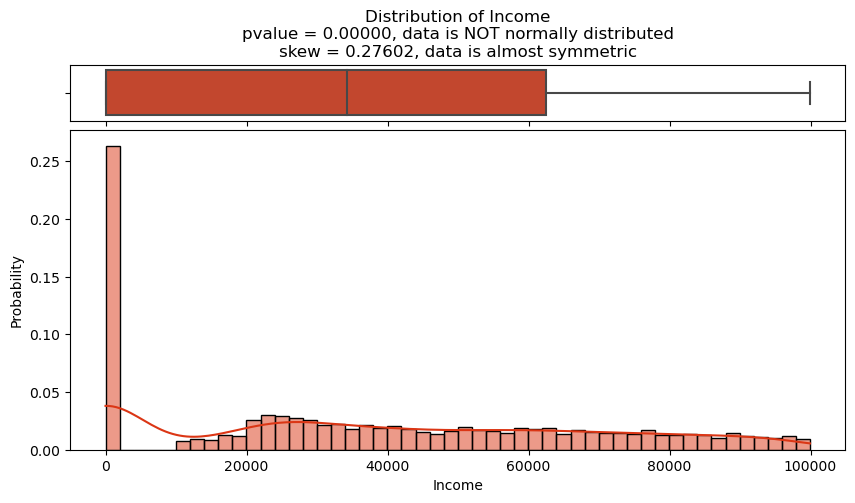

c:\Users\WIN10\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


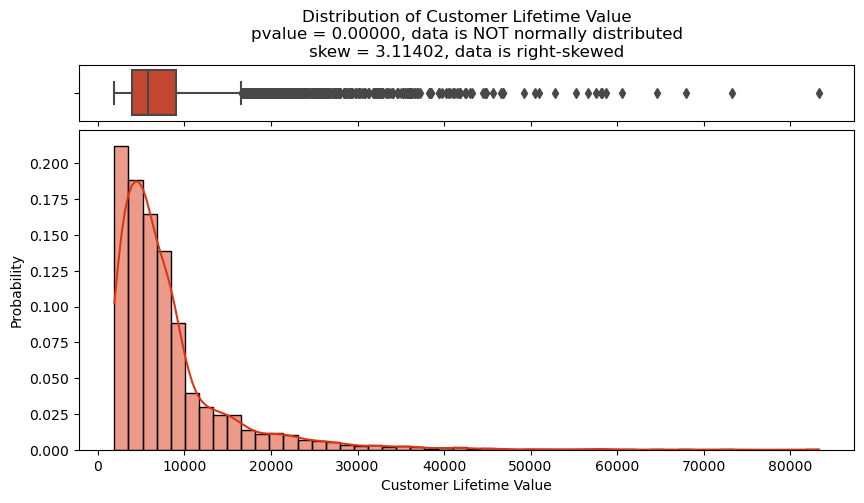

In [15]:
for column in num_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (10,5), gridspec_kw={"height_ratios": (.15, .85), "hspace": 0.05})

    stat, pvalue = normaltest(df[column].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data is normally distributed'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data is NOT normally distributed'

    skew = df[column].skew()

    if skew < -0.5:
        skewness = f'skew = {skew:.5f}, data is left-skewed'
    elif skew > 0.5:
        skewness = f'skew = {skew:.5f}, data is right-skewed'
    else:
        skewness = f'skew = {skew:.5f}, data is almost symmetric'

    ax1.set_title(f"Distribution of {column}\n{distribusi}\n{skewness}", color = 'black')
    sns.boxplot(x = df[column], ax = ax1, color = '#DB3615')
    ax1.set(xlabel = "")

    sns.histplot(data = df[column], ax = ax2, stat = "probability", kde=True, bins=50, color = '#DB3615')

    plt.show()

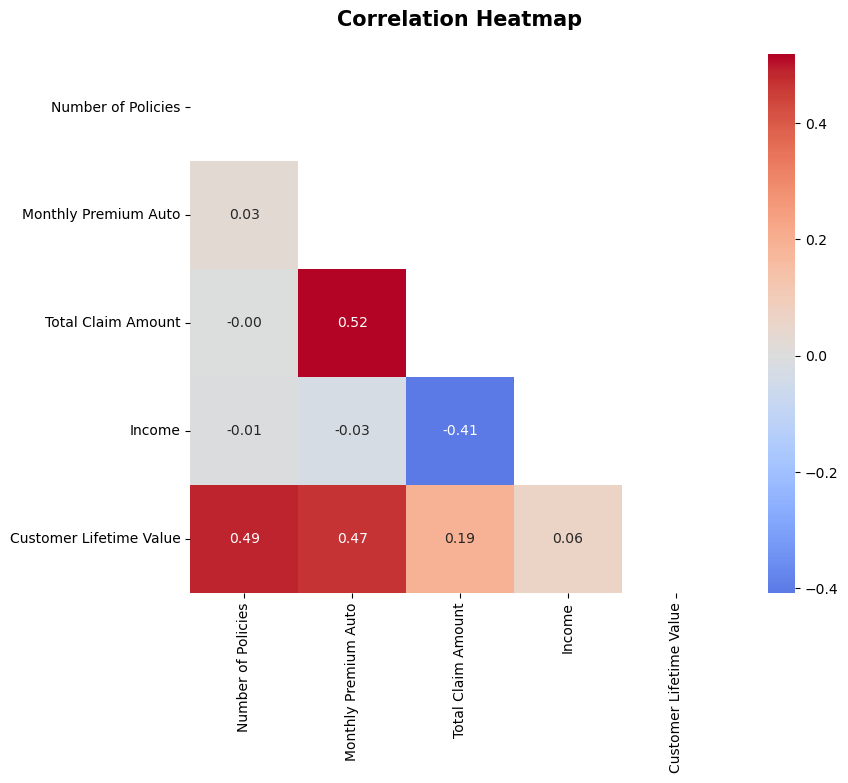

In [16]:
num_corr = df[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income', 'Customer Lifetime Value']]

plt.figure(figsize=(10,7))
matrix = np.triu(num_corr.corr(method='spearman'))
sns.heatmap(data=num_corr.corr(method='spearman'), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.title('Correlation Heatmap', size=15, pad=20, weight='bold')
plt.show()

### **Handling Outliers**

In [17]:
list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in num_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Column' : num_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Column,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,Number of Policies,-3.500000,8.500000,0,4823,228,4.51
1,Monthly Premium Auto,6.500000,170.500000,0,4799,252,4.99
2,Total Claim Amount,-192.743922,992.643348,0,4834,217,4.30
3,Income,-93707.250000,156178.750000,0,5051,0,0.00
4,Customer Lifetime Value,-3631.744439,16624.750075,0,4602,449,8.89


We will remove the outliers.

In [18]:
# Initial data count
df.shape[0]

5051

Let's remove the data with *Monthly Premium Auto* above 250.

In [19]:
# drop outliers Monthly Premium Auto
df = df[~(df['Monthly Premium Auto'] > 250)]
df.shape[0]

5030

It turns out there are 21 outlier entries in the 'Monthly Premium Auto' column that have been removed. Now, let's remove the data with a 'Total Claim Amount' above 2000.

In [20]:
# drop outliers Total Claim Amount
df = df[~(df['Total Claim Amount'] > 2000)]
df.shape[0]

5022

It turns out there are 8 outlier entries in the 'Total Claim Amount' column that have been removed. Now, let's remove the data with 'Customer Lifetime Value' above 16625.

In [21]:
# drop outliers Customer Lifetime Value
df = df[~(df['Customer Lifetime Value'] > 16625)]
df.shape[0]

4585

It turns out there are 437 outlier entries in the 'Customer Lifetime Value' column that have been removed.

So, the total number of outliers we have removed is 466 data points.

 ---
 Now, let's examine the relationship between each feature and the target (CLV).

In [22]:
cat_features = list(df.describe(include='object'))
cat_features

['Vehicle Class',
 'Coverage',
 'Renew Offer Type',
 'Employment Status',
 'Marital Status',
 'Education']

In [23]:
# Define numerical columns
num_features = list(df.describe().columns)
del num_features[-1]
num_features

['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']

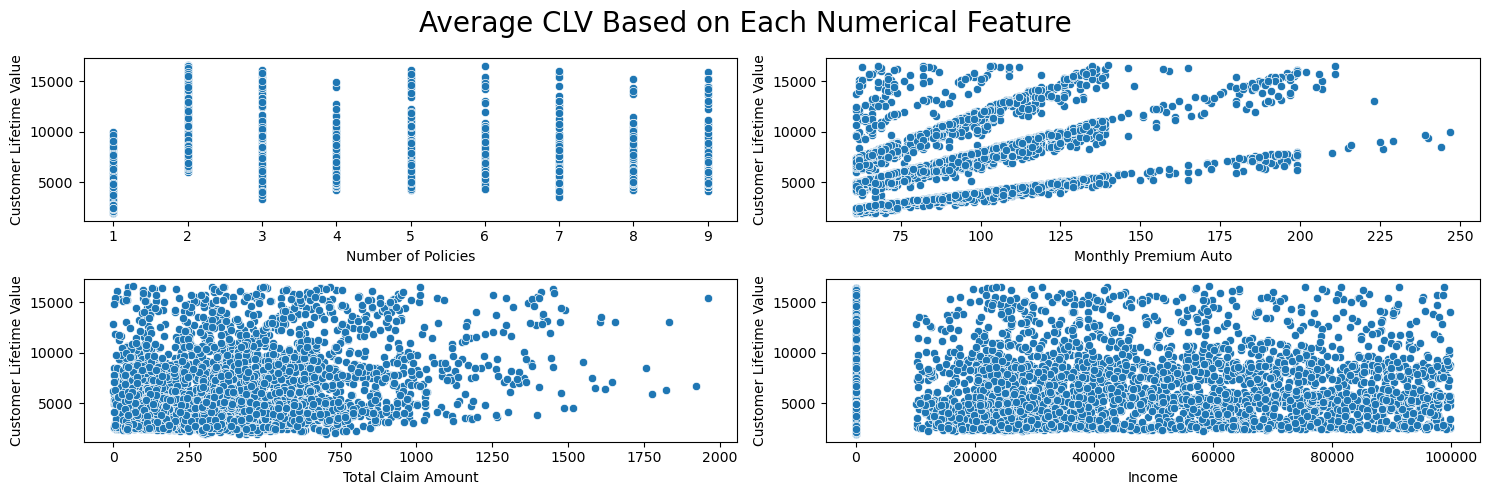

In [24]:
plot_number = 1
plt.figure(figsize=(15,5))
plt.suptitle('Average CLV Based on Each Numerical Feature', size=20)
for i in num_features:
    plt.subplot(2,2,plot_number)
    sns.scatterplot(data=df, x=df[i], y='Customer Lifetime Value')
    plt.tight_layout()
    plot_number += 1

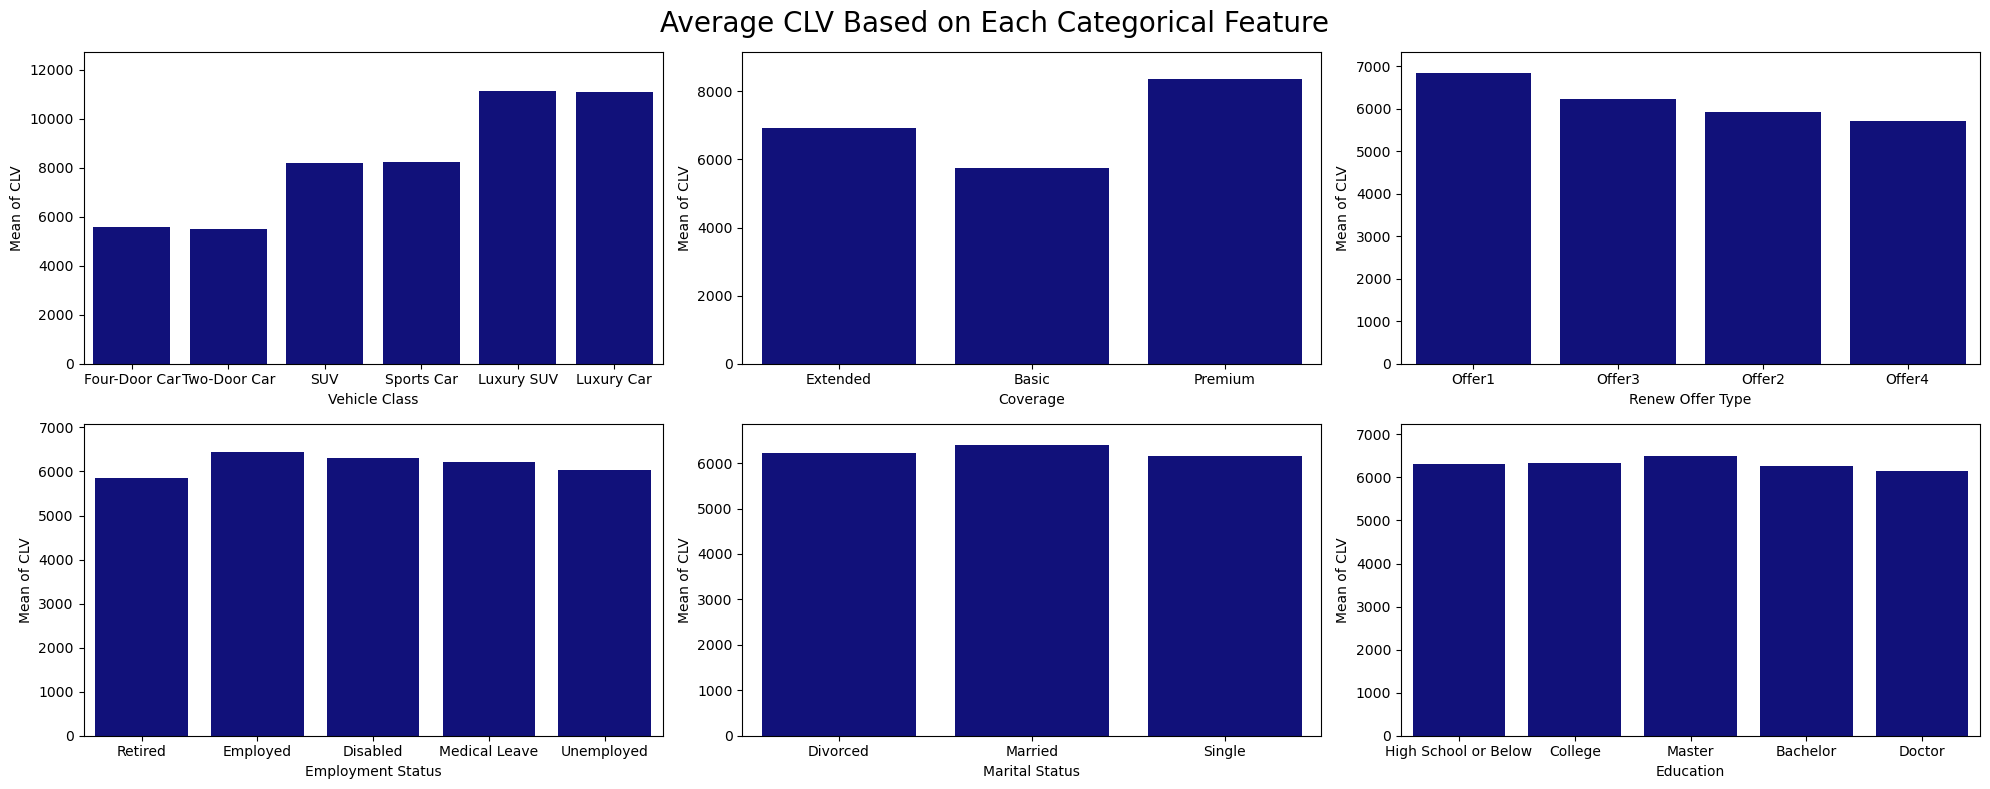

In [25]:
plot_number = 1
plt.figure(figsize=(20,8))
plt.suptitle('Average CLV Based on Each Categorical Feature', size=20)
for i in cat_features:
    plt.subplot(2,3,plot_number)
    sns.barplot(data=df, x=df[i], y='Customer Lifetime Value', color='darkblue', errcolor='None')
    plt.ylabel('Mean of CLV')
    plt.tight_layout()
    plot_number += 1

From the scatterplot and barplot above, we can see that the features most likely to influence CLV are Number of Policies, Monthly Premium Auto, and Coverage. We will verify this later using feature importance tests.

### **3. Data Preprocessing**

At the beginning of the data preprocessing stage, let's define X (features) and y (target) from this dataset. The goal of this project is to predict the Customer Lifetime Value based on the available features (features = all columns except the 'Customer Lifetime Value' column, target = 'Customer Lifetime Value' column).

In [26]:
X = df.drop(columns='Customer Lifetime Value')
y = df['Customer Lifetime Value']

Next, let's split our data into training and testing sets. Here, I am using a train-to-test ratio of 80:20 with random_state = 0.

I am not using the 'stratify' parameter in the data splitting because our target (the 'Customer Lifetime Value' column) is a numerical continuous variable.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
display(X_train, X_test, y_train, y_test)

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
5599,Sports Car,Extended,Offer2,Unemployed,Single,High School or Below,3.0,133.0,1361.993232,0.0
1702,Four-Door Car,Basic,Offer3,Employed,Married,College,1.0,65.0,150.235884,49308.0
36,Luxury SUV,Basic,Offer2,Unemployed,Single,High School or Below,1.0,192.0,1921.248929,0.0
4014,Four-Door Car,Basic,Offer4,Employed,Married,Master,1.0,70.0,173.426207,59124.0
4597,Two-Door Car,Basic,Offer1,Unemployed,Single,Bachelor,3.0,64.0,254.404622,0.0
...,...,...,...,...,...,...,...,...,...,...
1170,Four-Door Car,Premium,Offer1,Unemployed,Married,High School or Below,7.0,110.0,1002.782553,0.0
3977,Two-Door Car,Basic,Offer4,Employed,Single,High School or Below,3.0,67.0,279.184512,97917.0
1931,Four-Door Car,Extended,Offer2,Employed,Married,Master,7.0,91.0,436.800000,21841.0
3135,Four-Door Car,Extended,Offer2,Employed,Married,High School or Below,1.0,85.0,10.168824,59662.0


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
2945,SUV,Basic,Offer1,Unemployed,Married,High School or Below,3.0,117.0,561.600000,0.0
5636,Four-Door Car,Extended,Offer1,Unemployed,Divorced,College,6.0,96.0,460.800000,0.0
236,Four-Door Car,Premium,Offer3,Unemployed,Single,High School or Below,1.0,108.0,912.581597,0.0
1060,Four-Door Car,Extended,Offer1,Disabled,Single,College,1.0,97.0,465.600000,10275.0
2996,Two-Door Car,Basic,Offer2,Unemployed,Single,High School or Below,2.0,61.0,292.800000,0.0
...,...,...,...,...,...,...,...,...,...,...
575,Two-Door Car,Basic,Offer2,Unemployed,Single,College,1.0,63.0,302.400000,0.0
2168,Four-Door Car,Basic,Offer4,Unemployed,Married,Doctor,1.0,61.0,292.800000,0.0
3721,SUV,Basic,Offer2,Employed,Divorced,High School or Below,3.0,116.0,556.800000,71416.0
503,Four-Door Car,Basic,Offer2,Employed,Married,Bachelor,1.0,64.0,201.455005,76731.0


5599    9415.901707
1702    2597.864075
36      6745.248379
4014    2777.525403
4597    4490.549093
           ...     
1170    8278.786492
3977    4928.001408
1931    7380.086414
3135    3410.199334
3294    7659.499583
Name: Customer Lifetime Value, Length: 3668, dtype: float64

2945     8717.561149
5636     6877.817669
236      3923.265453
1060     3495.891476
2996    10634.837110
            ...     
575      2163.870179
2168     2267.604038
3721     9277.233839
503      2582.408525
4155     4913.118904
Name: Customer Lifetime Value, Length: 917, dtype: float64

Let's note which columns need to be processed:
- Numerical columns:
    - Scaling
        - Number of Policies
        - Monthly Premium Auto
        - Total Claim Amount
        - Income
        <br><br>
- Categorical columns:
    - Onehot Encoder
        - Vehicle Class
        - Renew Offer Type
        - Employment Status
        - Marital Status
        <br><br>
    - Ordinal Encoder
        - Coverage
        - Education

The 'Coverage' and 'Education' columns will be encoded using the ordinal method because both columns have an 'order' or 'ranking'.

Remember the missing values in the 'Income' column? Here, we will replace those missing values with NaN and then fill them using the Iterative Imputer.

In [29]:
# Converting '0' values in the 'Income' column to NaN
df['Income'] = df['Income'].replace([0], np.nan)

In [30]:
df['Income'].isna().sum()

1210

We have successfully replaced all missing values in the 'Income' column with NaN. This will make it easier for us when using the iterative imputer later.

Let's create a pipeline and transformer to preprocess this data.

In [31]:
df.head(3)

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2.0,90.0,571.479602,11828.0,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6.0,62.0,114.514440,44762.0,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2.0,62.0,257.248789,21514.0,11981.984810


In [32]:
# Creating ordinal mapping for the 'Coverage' and 'Education' columns
ordinal_mapping = [
    {'col':'Coverage', 'mapping':{'Basic':1, 'Extended':2, 'Premium':3, None:0}},
    {'col':'Education', 'mapping':{'High School or Below':1, 'College':2, 'Bachelor':3, 'Master':4, 'Doctor':5, None:0}}
]

In [33]:
# transformer 

pipe_iterative_robust = Pipeline([
    ('iterative_imputer', IterativeImputer(random_state=0)),
    ('scaler', RobustScaler())
])

pipe_ordinal_robust = Pipeline([
    ('ordinal_encoder', OrdinalEncoder(cols=['Coverage', 'Education'], mapping=ordinal_mapping)),
    ('scaler', RobustScaler())
])

transformer = ColumnTransformer([
    ('pipe_iterative_robust', pipe_iterative_robust, ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']),
    ('onehot_encoder', OneHotEncoder(drop='first'), ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']),
    ('ordinal_encoder', pipe_ordinal_robust, ['Coverage', 'Education']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_iterative_robust',
                                 Pipeline(steps=[('iterative_imputer',
                                                  IterativeImputer(random_state=0)),
                                                 ('scaler', RobustScaler())]),
                                 ['Number of Policies', 'Monthly Premium Auto',
                                  'Total Claim Amount', 'Income']),
                                ('onehot_encoder', OneHotEncoder(drop='first'),
                                 ['Vehicle Class', 'Renew Offer Type',
                                  'Employment Status', '...
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(cols=['Coverage',
                                                                       'Education'],
                                                                 mapping=[{'col': 'Coverage',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Basic       1
Extended    2
Premium     3
None        0
dtype: int64},
                                                                          {'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': High School or Below    1
College                 2
Bachelor                3
Master                  4
Doctor                  5
None                    0
dtype: int64}])),
                                                 ('scaler', RobustScaler())]),
                                 ['Coverage', 'Education'])])

All numerical features will go through the processes of *iterative imputer* and *robust scaling*.

The 'Vehicle Class', 'Renew Offer Type', 'Employment Status', and 'Marital Status' features will go through one-hot encoding because they do not have orders (categorical nominal).

The 'Coverage' and 'Education' features have orders/rankings (categorical ordinal), so these features will go through ordinal encoding and robust scaling.


In [34]:
# Fit and transform the data
transformed_data = transformer.fit_transform(df)
transformed_data

array([[ 0.00000000e+00,  2.63157895e-01,  7.03653088e-01, ...,
         1.00000000e+00, -5.00000000e-01,  1.00834869e+04],
       [ 1.33333333e+00, -4.73684211e-01, -8.89102912e-01, ...,
         0.00000000e+00,  0.00000000e+00,  4.94338612e+03],
       [ 0.00000000e+00, -4.73684211e-01, -3.91601111e-01, ...,
         0.00000000e+00,  1.00000000e+00,  1.19819848e+04],
       ...,
       [ 0.00000000e+00,  7.63157895e-01,  5.35374120e-01, ...,
         2.00000000e+00,  5.00000000e-01,  1.29049434e+04],
       [-3.33333333e-01, -4.73684211e-01, -1.13216150e+00, ...,
         0.00000000e+00,  5.00000000e-01,  2.44705313e+03],
       [-3.33333333e-01,  3.13157895e+00, -7.24930926e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.66421925e+03]])

In [35]:
# Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data)
transformed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.000000,0.263158,0.703653,-1.188960,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.5,10083.486880
1,1.333333,-0.473684,-0.889103,-0.055571,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4943.386117
2,0.000000,-0.473684,-0.391601,-0.855626,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11981.984810
3,-0.333333,0.947368,0.652487,-0.979551,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.5,4550.856045
4,-0.333333,-0.473684,-0.048028,-0.941111,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.5,2372.155492


In [36]:
# Fit the transformer
transformer.fit(df)

# Extract feature names
iterative_robust_features = ['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']
onehot_features = transformer.named_transformers_['onehot_encoder'].get_feature_names_out(['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status']).tolist()
ordinal_features = ['Coverage', 'Education']

# Get the passthrough columns
passthrough_columns = [col for col in df.columns if col not in iterative_robust_features + ['Vehicle Class', 'Renew Offer Type', 'Employment Status', 'Marital Status', 'Coverage', 'Education']]

# Combine all feature names
all_features = iterative_robust_features + onehot_features + ordinal_features + passthrough_columns

# Transform the data
transformed_data = transformer.transform(df)

# Convert to DataFrame
transformed_df = pd.DataFrame(transformed_data, columns=all_features)

# Display the transformed DataFrame
pd.set_option('display.max_columns', None)
transformed_df.head()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Employment Status_Employed,Employment Status_Medical Leave,Employment Status_Retired,Employment Status_Unemployed,Marital Status_Married,Marital Status_Single,Coverage,Education,Customer Lifetime Value
0,0.000000,0.263158,0.703653,-1.188960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.5,10083.486880
1,1.333333,-0.473684,-0.889103,-0.055571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4943.386117
2,0.000000,-0.473684,-0.391601,-0.855626,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,11981.984810
3,-0.333333,0.947368,0.652487,-0.979551,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,-0.5,4550.856045
4,-0.333333,-0.473684,-0.048028,-0.941111,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.5,2372.155492


### **4. Modeling**

**Cross Validation**

At this stage, we can determine the most suitable machine learning model or algorithm to predict CLV based on the dataset we have. Here is a list of algorithms for cross-validation:
- Linear Regression
- K Nearest Neighbor
- Decision Tree
- Random Forest
- XGBoost

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score, KFold

Let's create benchmark models for cross-validation.

In [38]:
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=0)
rf = RandomForestRegressor(random_state=0)
xgb = XGBRegressor(random_state=0)

models = [lr, knn, dt, rf, xgb]

List of evaluation metrics to be used for the cross-validation process in the scoring parameter:
- MSE
- RMSE
- MAE
- MAPE

In [39]:
eval_metric = {
    'mse': 'neg_mean_squared_error',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error',
    'r2': 'r2'}


In [40]:
list_MSE = []
list_mean_MSE = []
list_std_MSE = []

list_RMSE = []
list_mean_RMSE = []
list_std_RMSE = []

list_MAE = []
list_mean_MAE = []
list_std_MAE = []

list_MAPE = []
list_mean_MAPE = []
list_std_MAPE = []

list_R2 = []
list_mean_R2 = []
list_std_R2 = []

for algo in models:
    pipe_model = Pipeline([
        ('transformer', transformer),
        ('algo', algo)
    ])

    # Cross validation to find the best model
    cv_score = cross_validate(
        estimator= pipe_model,
        X= X_train, 
        y= y_train,
        scoring= eval_metric,
        cv = 5
    )
    # MSE Score
    list_MSE.append(cv_score['test_mse'])
    list_mean_MSE.append(cv_score['test_mse'].mean())
    list_std_MSE.append(cv_score['test_mse'].std())

    # RMSE Score
    list_RMSE.append(cv_score['test_rmse'])
    list_mean_RMSE.append(cv_score['test_rmse'].mean())
    list_std_RMSE.append(cv_score['test_rmse'].std())

    # MAE Score
    list_MAE.append(cv_score['test_mae'])
    list_mean_MAE.append(cv_score['test_mae'].mean())
    list_std_MAE.append(cv_score['test_mae'].std())

    # MAPE Score
    list_MAPE.append(cv_score['test_mape'])
    list_mean_MAPE.append(cv_score['test_mape'].mean())
    list_std_MAPE.append(cv_score['test_mape'].std())

    # R2 Score
    list_R2.append(cv_score['test_r2'])
    list_mean_R2.append(cv_score['test_r2'].mean())
    list_std_R2.append(cv_score['test_r2'].std())

In [41]:
df_cross_val = pd.DataFrame({
    'algo':models,

    'mse_mean':list_mean_MSE,
    'mse_std':list_std_MSE,
    'mse_all':list_MSE,

    'rmse_mean':list_mean_RMSE,
    'rmse_std':list_std_RMSE,
    'rmse_all':list_RMSE,

    'mae_mean':list_mean_MAE,
    'mae_std':list_std_MAE,
    'mae_all':list_MAE,

    'mape_mean':list_mean_MAPE,
    'mape_std':list_std_MAPE,
    'mape_all':list_MAPE,

    'r2_mean': list_mean_R2,
    'r2_std': list_std_R2,
    'r2_all': list_R2

}).sort_values('mape_mean', ascending=False)

df_cross_val

,algo,mse_mean,mse_std,mse_all,rmse_mean,rmse_std,rmse_all,mae_mean,mae_std,mae_all,mape_mean,mape_std,mape_all,r2_mean,r2_std,r2_all
3,RandomForestRegressor(random_state=0),-9.278114e+05,225547.579993,"[-1039557.0413020524, -1310615.4026695378, -75...",-956.449728,114.084613,"[-1019.5867012187107, -1144.8211225643672, -87...",-376.242277,27.081535,"[-400.7500338230178, -414.3241895022049, -367....",-0.045040,0.001999,"[-0.04754235786371834, -0.04563181199198474, -...",0.916770,0.017238,"[0.9065253362699311, 0.8883519514654401, 0.927..."
2,DecisionTreeRegressor(random_state=0),-1.714310e+06,297928.234777,"[-1910615.194745885, -2165345.5032940493, -134...",-1304.404143,113.312300,"[-1382.2500478371794, -1471.5112990711452, -11...",-477.570279,40.775435,"[-502.6460125081743, -537.250375891008, -420.1...",-0.058507,0.003441,"[-0.06138072847261909, -0.0614610933071392, -0...",0.845736,0.022478,"[0.8282017188563879, 0.8155396317230508, 0.871..."
4,"XGBRegressor(base_score=None, booster=None, ca...",-1.045992e+06,235801.272978,"[-1306470.7631167881, -1341777.778023362, -869...",-1016.255212,114.967328,"[-1143.0095201339261, -1158.3513189112196, -93...",-450.377163,23.649718,"[-475.58383692281166, -476.34035197363556, -43...",-0.065621,0.002058,"[-0.06508074881450315, -0.0653848460137925, -0...",0.906033,0.018575,"[0.8825250463384389, 0.8856973066406737, 0.917..."
1,KNeighborsRegressor(),-7.824522e+06,443761.851018,"[-8141230.3341612825, -8117586.771603913, -704...",-2796.079861,80.372502,"[-2853.2841313408103, -2849.13789971702, -2653...",-1911.378191,57.193053,"[-1918.1022570021796, -1922.079485052861, -184...",-0.351894,0.012026,"[-0.3367499276853585, -0.3535487644196716, -0....",0.293189,0.035621,"[0.26795862314432906, 0.30848308358538723, 0.3..."
0,LinearRegression(),-7.752719e+06,588205.866591,"[-8433990.995236237, -8296074.092996476, -6787...",-2782.327552,106.642824,"[-2904.1334327534328, -2880.290626481376, -260...",-2080.562279,58.949945,"[-2122.2860512254, -2121.859639463396, -1965.5...",-0.378856,0.006076,"[-0.3689669830004464, -0.3850372656667395, -0....",0.300499,0.036597,"[0.2416342337552696, 0.29327819504138675, 0.35..."


From the cross-validation results above, it turns out that the best machine learning model or algorithm for our data is random forest (to determine the best model, I look at the smallest average MAPE).

### **Hyperparameter Tuning**

In [42]:
# Define hyperparameter space
hyperparam_space = {
    'modeling__n_estimators': range(10, 1001, 10),
    'modeling__max_depth': range(2, 101, 2),
    'modeling__min_samples_split': range(2, 101, 2),
    'modeling__min_samples_leaf': range(1, 101, 1),
    'modeling__max_features': ['sqrt', 'log2', None]
}

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', rf)
    ])

# Define cross-validation strategy
crossval = KFold(n_splits=5, shuffle=True, random_state=0)

randomsearchrf1 = RandomizedSearchCV(
    estimator=pipe_model,
    param_distributions=hyperparam_space,
    cv=crossval,
    scoring='neg_mean_absolute_percentage_error',
    n_jobs=-1,
    n_iter=50,
    random_state=0
)

randomsearchrf1.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_iterative_robust',
                                                                               Pipeline(steps=[('iterative_imputer',
                                                                                                IterativeImputer(random_state=0)),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Number '
                                                                                'of '
                                                                                'Policies',
                                                                                'Monthly '
                                                                                'Premium '
                                                                                'Auto',
                                                                                'Total '
                                                                                'Cl...
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'modeling__max_depth': range(2, 101, 2),
                                        'modeling__max_features': ['sqrt',
                                                                   'log2',
                                                                   None],
                                        'modeling__min_samples_leaf': range(1, 101),
                                        'modeling__min_samples_split': range(2, 101, 2),
                                        'modeling__n_estimators': range(10, 1001, 10)},
                   random_state=0,
                   scoring='neg_mean_absolute_percentage_error')

After we perform tuning, let's check the best hyperparameters.

In [43]:
list_resultrf1 = []

for i in randomsearchrf1.best_params_:
    result = randomsearchrf1.best_params_[i]
    list_resultrf1.append(result)

list_resultrf1.append(randomsearchrf1.best_score_)

df_randomsearch_rf_result1 = pd.DataFrame({
    'Parameter':['n_estimators', 'min_samples_split', 'min_samples_leaf', 'max_features', 'max_depth', 'MAPE'],
    'Best Result':list_resultrf1
})

df_randomsearch_rf_result1

,Parameter,Best Result
0,n_estimators,760.000000
1,min_samples_split,18.000000
2,min_samples_leaf,4.000000
3,max_features,NaN
4,max_depth,84.000000
5,MAPE,-0.043762


---
From the cross-validation, hyperparameter tuning, and randomized search results, the best model is __random forest__ with the following hyperparameters:

In [44]:
randomsearchrf1.best_params_

{'modeling__n_estimators': 760,
 'modeling__min_samples_split': 18,
 'modeling__min_samples_leaf': 4,
 'modeling__max_features': None,
 'modeling__max_depth': 84}

__*Random Forest Regressor*__ is a machine learning model or algorithm used to predict a numerical value. This model works by constructing multiple decision trees and combining the results of each tree to make a final prediction. Each tree is built randomly from the dataset. Each tree makes its own prediction, and the results from all trees are combined into a final prediction. Typically, this combination is done by averaging the predictions from each tree.

__*Random Forest Regressor*__ has several advantages, such as high model stability and the ability to handle cases where certain features strongly influence the target while minimizing overfitting. However, this method requires longer processing time compared to other methods and also requires more memory due to the large number of trees built. Here, I address these issues by limiting the number of trees built using the n_estimators parameter.

---
Predict on the test set before tuning (using the benchmark model).

In [45]:
model = RandomForestRegressor(random_state=0)

pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
    ])

pipe_model.fit(X_train, y_train)

y_pred_before = pipe_model.predict(X_test)


MAPE_before = mean_absolute_percentage_error(y_test, y_pred_before)
MAE_before = mean_absolute_error(y_test, y_pred_before)
MSE_before = mean_squared_error(y_test, y_pred_before)
RMSE_before = MSE_before ** 0.5
R2_before = r2_score(y_test, y_pred_before)

Predict on the test set after tuning (using the model with the best hyperparameters).

In [46]:
model = randomsearchrf1.best_estimator_

model.fit(X_train, y_train)

y_pred_after = model.predict(X_test)


MAPE_after = mean_absolute_percentage_error(y_test, y_pred_after)
MAE_after = mean_absolute_error(y_test, y_pred_after)
MSE_after = mean_squared_error(y_test, y_pred_after)
RMSE_after = MSE_after ** 0.5
R2_after = r2_score(y_test, y_pred_after)

Let's create a table that compares the performance of the model before and after the tuning process.

In [47]:
df_compare = pd.DataFrame({
    'Condition':['Before tuning', 'After tuning'],
    'MAPE': [MAPE_before, MAPE_after],
    'MAE': [MAE_before, MAE_after],
    'MSE': [MSE_before, MSE_after],
    'RMSE': [RMSE_before, RMSE_after],
    'R2': [R2_before,R2_after]
})

df_compare

,Condition,MAPE,MAE,MSE,RMSE,R2
0,Before tuning,0.046235,385.311367,975288.127687,987.566771,0.908917
1,After tuning,0.045511,383.312042,945300.653066,972.265732,0.911717


The model shows improved performance (reduced values of MAPE, MAE, MSE, and RMSE) after hyperparameter tuning, although only slightly.
- Before tuning:
    - MAPE = 4.62%
    - MAE = 385.31
    - MSE = 975,288.12
    - RMSE = 987.56
    - R2 = 90.89%
<br><br>
- After tuning:
    - MAPE = 4.55%
    - MAE = 383.31
    - MSE = 945,300.65
    - RMSE = 972.26
    - R2 = 91.17%

Let's check for overfitting/underfitting.

In [61]:
y_train_pred = model.predict(X_train)
y_pred_after = model.predict(X_test)

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_pred_after)

print(f"Training MAPE: {mape_train}")
print(f"Test MAPE: {mape_test}")

# Interpretation
if mape_train < mape_test:
    print("The model is likely overfitting.")
elif mape_train > mape_test:
    print("The model is likely underfitting.")
else:
    print("The model seems to generalize well.")

Training MAPE: 0.03401625890424577
Test MAPE: 0.045511013178580265
The model is likely overfitting.


Let's create a scatterplot to visualize the comparison between the actual CLV and the predicted CLV by the model.

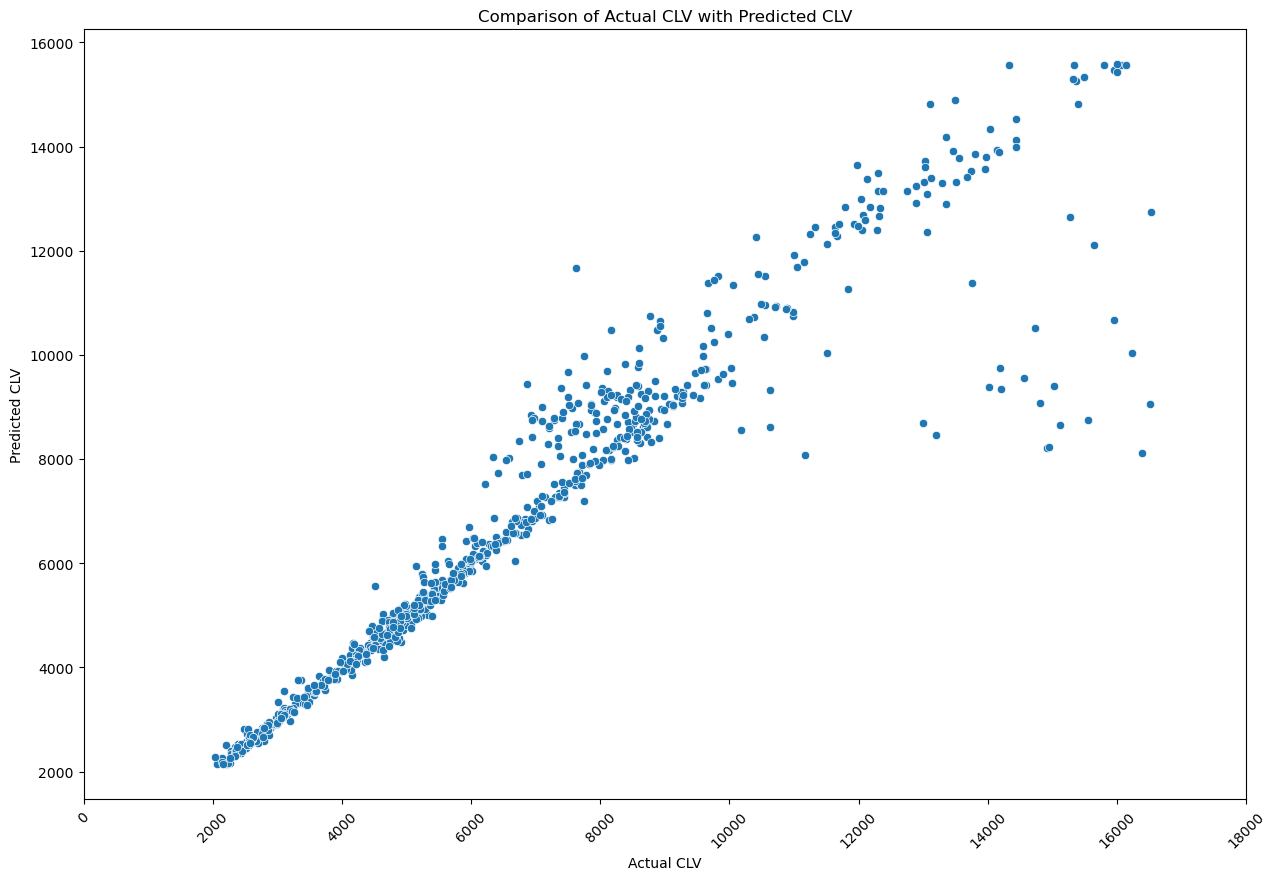

In [49]:
plt.figure(figsize=(15,10))
plot = sns.scatterplot(x=y_test, y=y_pred_after).set(title='Comparison of Actual CLV with Predicted CLV', 
                                               xlabel='Actual CLV', 
                                               ylabel='Predicted CLV')
plt.xticks(ticks=range(0,18001,2000), rotation=45)
plt.show()

The presence of large error values creates a significant difference between the RMSE and MAE values. This can also be observed in the scatterplot above, where there are instances of actual CLV being low but predicted much higher (overestimation), and vice versa (underestimation).

From the scatterplot above, we can observe that for lower CLV values, the model tends to be more accurate in predicting customer CLV. However, as the actual CLV values increase, the model's predictions become less accurate. This is a limitation of the model.

---
Let's see which features are most important in determining the CLV of a customer.

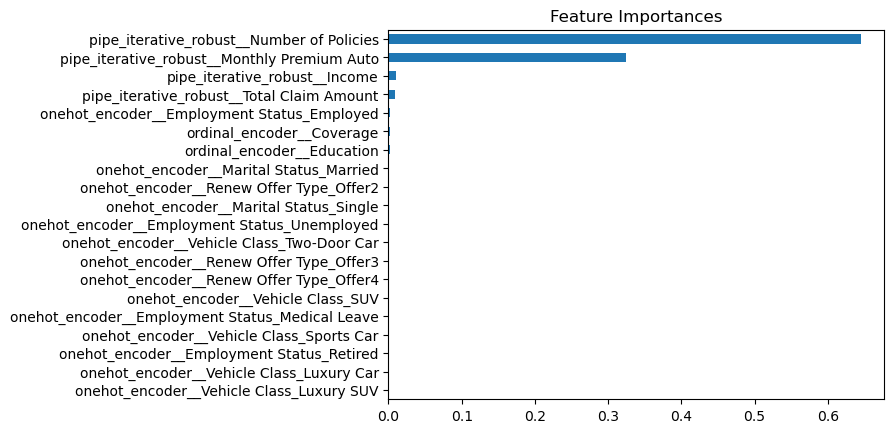

In [50]:
# Plot feature importances
feature_imp = pd.Series(randomsearchrf1.best_estimator_['modeling'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances')
plt.show()

It turns out, the most important feature in determining the CLV of a customer is Number of Policies (the number of insurance policies owned by the customer) followed by Montly Premium Auto and Income.

### **5. Conclusion**

Let's test our model on one of the customers from company A. Here, I will choose the customer ranked 236 from the original dataset with the following feature details:

In [51]:
# Selecting one customer data for testing.
df_testing = X_test.head(3)
customerA = df_testing.tail(1)
customerA

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
236,Four-Door Car,Premium,Offer3,Unemployed,Single,High School or Below,1.0,108.0,912.581597,0.0


In [52]:
# Testing the model to find the predicted CLV value for customer A
best_model = randomsearchrf1.best_estimator_

best_model.fit(X_train, y_train)

clv_customerA_prediction = model.predict(customerA)
clv_customerA_prediction

array([3783.97218661])

In [53]:
# Finding the actual CLV value for customer A
clv_customerA_actual = df['Customer Lifetime Value'].iloc[236]
clv_customerA_actual

4758.564558

We can conclude that the predicted CLV for customer A is 3,783.97 with an error of approximately ±4.55% (the best MAPE value obtained from the modeling process). Therefore, the possible range of predicted CLV for customer A is between 3,611.8 and 3,956.14. However, upon checking, the actual CLV value for customer A is 4,758.56, which differs significantly from our prediction.

---
Based on the modeling conducted, the feature 'Number of Policies' emerges as the most influential factor affecting 'Customer Lifetime Value' (CLV).

The evaluation metric used for the model is MAPE (Mean Absolute Percentage Error). With a MAPE value of 4.55% obtained after hyperparameter tuning, we can infer that if this model were used to estimate CLV for new customers at company A within the trained range of values (obtained from df.describe(include='all') function):

- 'Number of Policies' ranges from 1 to 9
- 'Monthly Premium Auto' ranges from 61 to 297
- 'Total Claim Amount' ranges from 0.42 to 2759.79
- 'Income' ranges from 10,037 to 99,934
- 'Vehicle Class' includes categories like Four-Door Car, Two-Door Car, SUV, Sports Car, Luxury Car, and Luxury SUV
- 'Coverage' types are Basic, Extended, and Premium
- 'Renew Offer Type' includes Offer1, Offer2, Offer3, and Offer4
- 'Employment Status' includes Employed, Unemployed, Medical Leave, Disabled, and Retired
- 'Marital Status' includes Married, Single, and Divorced
- 'Education' levels are High School or Below, College, Bachelor, Master, and Doctor

The estimated CLV would on average deviate by approximately 4.55% from the actual CLV values. However, there's a possibility that predictions could deviate further due to the bias still evident in the model, as seen from the visualization comparing actual CLV and predictions. This bias stems from the limited features in the dataset that can represent various aspects of customer information, such as vehicle class, insurance type, employment status, marital status, education level, and others.

This model can certainly be improved to yield better predictions. However, we need to address the following limitations:

1. Limited number of features: With only 10 features in the dataset, the model's ability to learn is constrained, which affects its predictive capability.

2. Small dataset size: With only 5,669 initial data points, the model learns within this limited data range. Predicting data outside this dataset range may result in less accurate and less reliable predictions.

Improving the model's performance requires addressing these limitations effectively.

### **6. Recommendation**

### For Business.

Due to the significant error between actual CLV and predicted CLV, the predictions from this model should not be blindly relied upon by the company to forecast customer CLV. This is primarily due to the limitations outlined above. However, predictions for lower CLV values are still reasonably accurate. The company can still trust the model predictions for CLV values below approximately 8000 (based on the scatterplot visualization).

### For Model Performance.

The company can improve the model performance through several approaches, including:

- Increasing Customer Features: This can reduce the risk of underfitting. However, additional features should be chosen carefully. If too many features are added, the model might tend to overfit. Consider adding features strongly correlated with CLV, such as customer retention rates (longer customer tenure generally indicates higher CLV), purchase frequency (more frequent purchases correlate with higher CLV), and customer demographics (different customer segments may exhibit different purchasing behaviors affecting their CLV).

- Increasing Customer Data: This can make the model "smarter" by learning from more diverse and heterogeneous data. It also reduces the risk of overfitting.

- Improving Data Quality: The principle of GIGO (Garbage In, Garbage Out) applies here. No matter how sophisticated the model, if the input data is of poor quality, the output will also be of low quality.

- Using GridSearch for Hyperparameter Tuning: While Randomized Search was used due to time and computational limitations, GridSearch typically yields better hyperparameter tuning results. It systematically tests all combinations of hyperparameters within a defined grid to find the optimal set.

- Exploring Other Complex Machine Learning Algorithms: Consider more advanced models like neural networks, deep learning algorithms, or survival analysis. These models can potentially enhance performance, although they are more complex and challenging to interpret.

These strategies can help in refining the model's accuracy and robustness, addressing the current limitations and enhancing its predictive capabilities for Customer Lifetime Value (CLV).

---
---
# Save Model

In [54]:
# Save model
import pickle
best_model = randomsearchrf1.best_estimator_

best_model.fit(X_train, y_train)

pickle.dump(best_model, open('Model_Customer_Lifetime_Value_Prediction_RF_arif_014.sav', 'wb'))

In [55]:
# Save model
import pickle
best_model = randomsearchrf1.best_estimator_

best_model.fit(X_train, y_train)

pickle.dump(best_model, open('Model_Customer_Lifetime_Value_Prediction_RF_arif_014.pkl', 'wb'))

Testing the model on a new customer

In [57]:
# Load model
filename = 'Model_Customer_Lifetime_Value_Prediction_RF.sav'
loaded_model = pickle.load(open(filename, 'rb'))

Checking the range of each feature that the model has learned.

In [58]:
display(df.describe(), df.describe(include='object'))

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,4585.000000,4585.000000,4585.000000,3375.000000,4585.000000
mean,3.072846,89.985605,414.989367,51150.042370,6312.351490
std,2.467576,29.207803,264.905707,24243.362245,3318.182965
min,1.000000,61.000000,0.423310,10037.000000,1898.007675
25%,1.000000,68.000000,250.697824,29521.500000,3700.420255
50%,2.000000,80.000000,369.600000,48689.000000,5488.931031
75%,4.000000,106.000000,537.600000,70788.500000,8152.244431
max,9.000000,247.000000,1961.162049,99934.000000,16589.712370


,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education
count,4585,4585,4585,4585,4585,4585
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2405,2864,1814,2889,2727,1397


Creating features/information for that new customer.

In [59]:
tester = pd.DataFrame({
    'Vehicle Class':['Four-Door Car'],
    'Coverage':['Basic'],
    'Renew Offer Type':['Offer1'],
    'Employment Status':['Employed'],
    'Marital Status':['Married'],
    'Education':['Bachelor'],
    'Number of Policies':[5],
    'Monthly Premium Auto':[500],
    'Total Claim Amount':[1000],
    'Income':[80000]
})

tester

,Vehicle Class,Coverage,Renew Offer Type,Employment Status,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income
0,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,5,500,1000,80000


Applying the model to a new prospective customer.

In [60]:
loaded_model.predict(tester)

array([15579.40197623])

It turns out that a prospective customer with the following features:
- Vehicle Class = Four-Door Car
- Coverage = Basic
- Renew Offer Type = Offer1
- Employment Status = Employed
- Marital Status = Married
- Education = Bachelor
- Number of Policies = 5
- Monthly Premium Auto = 500
- Total Claim Amount = 1000
- Income = 80000

is predicted to have a CLV value of 15579.40.